# **BeamformingBasics**
Basic delay-and-sum beamforming routines in Python for demonstration purposes

https://urldefense.com/v3/__https://github.com/fchirono/BeamformingBasics*5Cn__;JQ!!DZ3fjg!5454Nl4dPH5781V18td6l6M92jdrYpGoIRY7ytwlwedT4RHnjSUatF4y5TCPPaJFWi7dM2yxk8kzu4rK6jNIymIPJfE$ 

This Python package provides some basic functions for creating Uniform Linear Arrays (ULAs) and delay-and-sum beamforming using these arrays. The implementations provided herein are **not** optimized in any form, and instead are meant to illustrate some basic principles.

### Author:
Fabio Casagrande Hirono - fchirono [at] gmail.com

April 2021

Beitong Tian - beitong2 [at] illinois.edu

Cody Wang - yaohuiw2 [at] illinois.edu

May 2022

# Beamforming Tutorial

Let us use the `BeamformingBasics` package to create a Uniform Linear Array, synthesize some acoustic signals, and apply delay-and-sum beamforming to these signals. We encourage you to play around with this code and change some variables; the ones we recommend you to try and change are positioned within blocks of comments that look like `*-*-*-*-`, but feel free to play around with any other part of the code.

To run this iPython Notebook, click on a block of code and press `CTRL+Enter` to run the block. Alternatively, hover the mouse cursor near the two square brackets to the left of the block (`[ ]`) until they transform into a "play" button, and click on the button. The code will run, and any output will be displayed immediately below it.

We begin by cloning the Python package from its GitHub repo to Google Colab's virtual machine using the commands below. If you would like to try it on your own machine, it's probably easier to just download the package directly from GitHub.

In [78]:
!git clone https://urldefense.com/v3/__https://github.com/fchirono/BeamformingBasics.git*5Cn__;JQ!!DZ3fjg!5454Nl4dPH5781V18td6l6M92jdrYpGoIRY7ytwlwedT4RHnjSUatF4y5TCPPaJFWi7dM2yxk8kzu4rK6jNI0YwljyM$ 

import sys
sys.path.insert(0,'/content/BeamformingBasics')



zsh:1: no matches found: https://urldefense.com/v3/__https://github.com/fchirono/BeamformingBasics.git*5Cn__
zsh:1: command not found: JQ!!DZ3fjg!5454Nl4dPH5781V18td6l6M92jdrYpGoIRY7ytwlwedT4RHnjSUatF4y5TCPPaJFWi7dM2yxk8kzu4rK6jNI0YwljyM$


Let us now import the usual Python packages for scientific programming: `numpy` for numerical computing, `matplotlib` for plotting, and our own `BeamformingBasics` (imported as `bf`), and define our constant `c0` for the speed of sound:

In [79]:
# package for numeric computing
import numpy as np

# package for basic plotting
from matplotlib import pyplot as plt

# package for beamforming basics
import BeamformingBasic as bf


# speed of sound
c0 = 1500.

We now define the necessary variables to create a vector `t` of time-domain samples, of duration `T` seconds and sampling frequency `fs` Hz

In [80]:
'''
Intuition: create an array of shape 1 by no of cycles, 
each entry represent the corresponding start time of the cycle
'''
# Create vector of time samples
fs = 48e3       # sampling freq [Hz]
dt = 1./fs      # temporal resolution [s]
T = 0.5           # length of recording [s]

N_cycles_in_recording = int(T*fs)

# vector of time samples
t = np.linspace(0, T-dt, N_cycles_in_recording)
print(t.shape)
print(t)

(24000,)
[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 4.99937500e-01
 4.99958333e-01 4.99979167e-01]


Onwards to our Uniform Linear Array: the `BeamformingBasics` package allows us to create a ULA by calling the function `bf.SensorArray(L, M)`, where `L` is the array length in meters and `M` is the number of sensors (here we assume `M` is always odd for simplicity). Note that, upon successful creation of our ULA, the function will automatically print the inter-sensor spacing for this array:

In [81]:
# create uniform linear array - try to change these values and see what happens!

# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# Array length [m]

L = 0.45
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# Number of sensors in array (must be odd!)

M = 3
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
MyULA = bf.SensorArray(L, M)

Array inter sensor spacing is 0.225 m


Our array definition is stored in the object `MyULA`, and its properties can be explored by accessing its attributes (i.e. "data") as shown here:

In [82]:
print(MyULA.M)    # number of elements in array
print(MyULA.L)    # array length
print(MyULA.d)    # inter-sensor spacing
print(MyULA.m)    # vector of indices (from -(M-1)/2 to +(M-1)/2, so m=0 is center element)
print(MyULA.XY)   # (2, M)-shaped array containing the (x,y) coordinates of each sensor

3
0.45
0.225
[-1  0  1]
[[-0.225  0.     0.225]
 [ 0.     0.     0.   ]]


#### Added Part (MAINTLET)
1. Importing our signal data, loading wavfile into a np array with sample_rate and data(data_length, no_of_channels);
2. filter to get first 3 channels and extract the middle part 0.5s interval for experiment
3. reverse the sensors to make it suitable for later processing

In [83]:
# TBT load our own data
from scipy.io import wavfile

filename = '../data/4K_45_16_48000_10s.wav'

sampleRate, data = wavfile.read(filename)
print(f"sample rate: {sampleRate}")
print(f"data  shape: {data.shape}")
# remove first 20000
front_offset = 48000*5
# extract 0.5S
#get the 0.5s starting at 5s, while extracting the middle 3 channels
data = data[front_offset:front_offset+24000,1:4].T
print(data)

data = np.flip(data, 0)
print(f"data  shape: {data.shape}")
print(data)

sample rate: 48000
data  shape: (480000, 8)
[[ 168  104   88 ...   36  124   96]
 [-300 -244   44 ... -284 -328 -276]
 [  16  -76 -196 ...  240  264  160]]
data  shape: (3, 24000)
[[  16  -76 -196 ...  240  264  160]
 [-300 -244   44 ... -284 -328 -276]
 [ 168  104   88 ...   36  124   96]]


#### Added Part (MAINTLET)

Choose the following if we want to simulate receiving signal waves.
1. one direction of arrival `theta0_deg` for our incoming plane wave containing the narrowband pulse, 
2. the onset time `t_initial` for the pulse, 
3. a signal-to-noise ratio `SNR` in decibels for the array signals.


However, we have our audio wave file loaded, so just take a look at the wave graph generated and move on.

(3, 24000)


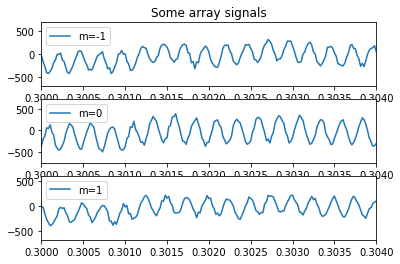

In [84]:
# create array of sensor signals from a given direction of arrival

# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# direction of arrival of narrowband pulse, in degrees
# --> try any value between 0 and 180

theta0_deg = 135.
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# signal-to-noise ratio at array signal
# --> 'None' means no noise is present
# --> 60 dB means very little noise is present
# -->  0 dB means signal and noise have the same power - will the beamformer even work?

# SNR_dB = 60
# # *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

# # onset time of narrowband pulse
t_initial = 0.3

p_array = data
print(p_array.shape)
# plot first, middle and last array signals
plt.figure()
m_index = [0, int((M-1)/2), M-1]
for m in range(3):
    plt.subplot(3, 1, m+1)
    
    if m == 0:
        plt.title('Some array signals')
    plt.plot(t, p_array[m_index[m],:], label='m={}'.format(m_index[m]-M//2))
    plt.xlim([t_initial, t_initial+2*T_pulse])
    plt.legend()


#### Added Part (MAINTLET)
So as this block

For a visual reference, let us plot a plane wave acoustic field at the same frequency and direction of arrival as the narrowband pulse created above.

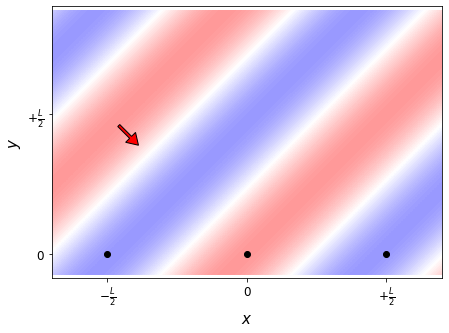

In [85]:
# Create 2D mesh of (x, y) points
mesh_side1 = np.linspace(-0.7*L, 0.7*L, 1400)
mesh_side2 = np.linspace(-0.475*L, 0.475*L, 950)
XY_mesh = np.array(np.meshgrid(mesh_side1, mesh_side2))

XY_mesh[1] += 0.4*L

# create acoustic wavenumber vector, pointint at the DIRECTION OF PROPAGATION
# of the plane wave (opposite to the DIRECTION OF ARRIVAL!)
k0 = 2*np.pi/ac_wavelength
theta0 = theta0_deg*np.pi/180.
k_vec = k0*np.array([-np.cos(theta0), -np.sin(theta0)])

# create plane wave acoustic field
p_planewave = np.exp(-1j*np.tensordot(k_vec, XY_mesh, axes=(0,0)))

# plot acoustic field and array positions
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.pcolormesh(XY_mesh[0], XY_mesh[1], p_planewave.real, cmap='seismic',
              shading='nearest', vmin=-5, vmax=+5)
ax.plot(MyULA.XY[0], MyULA.XY[1], 'ko')
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_xticks(ticks=np.array([-0.5, 0., 0.5])*L)
ax.set_xticklabels([r'$-\frac{L}{2}$', r'$0$', r'$+\frac{L}{2}$'],
                   fontsize=12)
ax.set_ylabel(r'$y$', fontsize=15)
ax.set_yticks(ticks=np.array([0., 0.5])*L)
ax.set_yticklabels([r'$0$', r'$+\frac{L}{2}$'], fontsize=12)
ax.axis('equal')

# indicate direction of propagation of plane wave with a red arrow
ax.arrow(0.65*L*np.cos(theta0), 0.65*L*np.sin(theta0),
         -0.1*L*np.cos(theta0), -0.1*L*np.sin(theta0),
         width=0.01*L, head_width=0.05*L, head_length=0.04*L,
         length_includes_head=True, edgecolor = 'k', facecolor = 'r')


#### Added Part (MAINTLET)

The actual beamforming calculation is performed via the function `bf.delayandsum_beamformer`
1. the ULA object
2. the sensor signals 
3. the vector of look directions
4. the sampling frequency 

function returns a (`N_theta`, `N_time`)-shaped array containing the beamformer output signal y(t) for each look direction theta

In [86]:
# use delay-and-sum beamforming to map direction of arrival

N_theta = 181
theta = np.linspace(0, np.pi, N_theta)

N_DoA = int(theta0_deg)

# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
## array shading schemes - uncomment one

weights = np.ones(M)
# weights = ss.windows.hann(M)
# weights = ss.windows.chebwin(M, 40)
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

y_beamformer = bf.delayandsum_beamformer(MyULA, p_array, theta, weights, fs)

We now plot the beamformer output y(theta, t) for a few candidate steering directions - say, 0 deg, 45 deg and 90 deg. If the steering direction matches the direction of arrival `theta0` of the plane wave, you should see a large amplitude pulse; otherwise, destructive interference between the misaligned sensor signals will yield a low amplitude result - or perhaps even zero!

It is very interesting to compare the beamformer output y(t) to the signal captured by the center sensor p0(t). The second figure was created so that it superimposes the center sensor signal to the beamformer output when the steering direction matches the plane wave DoA(Direction of Arrival). Note how the beamformer output has significantly less noise than the single sensor.

Text(0.5, 1.0, 'Center sensor vs. beamformer output')

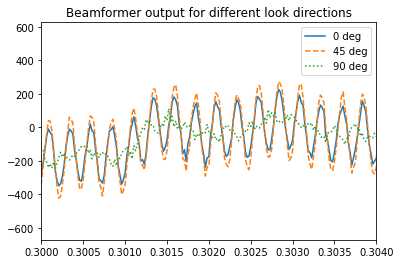

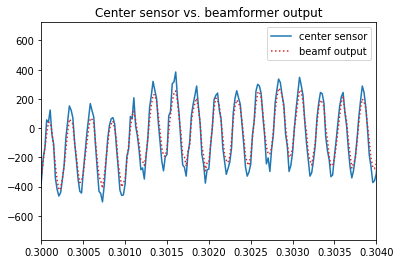

In [87]:
# plot beamformer output for different steering directions
target = 45
plt.figure()
plt.plot(t, y_beamformer[0, :], label='0 deg')
plt.plot(t, y_beamformer[target, :], '--', label=str(target) + ' deg')
plt.plot(t, y_beamformer[90, :], ':', label='90 deg')
plt.xlim([t_initial, t_initial+2*T_pulse])
plt.legend()
plt.title('Beamformer output for different look directions')


# compare beamformer output to center sensor signal
plt.figure()
plt.plot(t, p_array[M//2, :], label='center sensor')
plt.plot(t, y_beamformer[target, :], ':', label='beamf output', color='C3')
plt.xlim([t_initial, t_initial+2*T_pulse])
plt.legend()
plt.title('Center sensor vs. beamformer output')


Finally, let us look into the polar response of the beamformer. For convenience, we'll also indicate the plane wave direction of arrival with a red arrow.

The polar plot restricts the minimum magnitude below the peak through the variable `dyn_range`. Certain beamformer configurations can lead to the sidelobes disappearing from the image (for example, when the array shading scheme significantly reduces their amplitude), while others can lead to an almost uniform angular response, with a very small main lobe value (for example, when the SNR is low). Make sure to increase or decrease `dyn_range` accordingly.

89.76291475888596
[88.14027765 88.14197498 88.14706341 88.15553226 88.16736352 88.18253152
 88.20100252 88.2227341  88.24767446 88.27576157 88.30692218 88.34107072
 88.37810816 88.41792069 88.46037858 88.50533501 88.55262512 88.60206536
 88.65345331 88.70656794 88.76117064 88.81700684 88.87380836 88.93129632
 88.9891845  89.04718274 89.105      89.16234679 89.2189363  89.27448406
 89.32870587 89.38131406 89.43201259 89.48049162 89.52642265 89.56945537
 89.60921734 89.64531724 89.67735184 89.7049161  89.72761475 89.74507327
 89.75694538 89.76291476 89.76268922 89.75598732 89.74251923 89.72196598
 89.69396247 89.65809045 89.61388637 89.56086643 89.49856691 89.42659362
 89.34467048 89.25267547 89.15065424 89.03880607 88.91744513 88.78694899
 88.64771268 88.50012892 88.34460883 88.18164463 88.01189834 87.83628575
 87.65601893 87.47257915 87.28761618 87.10280196 86.91969507 86.73968015
 86.56402342 86.39403546 86.23127352 86.07767858 85.93554957 85.80731602
 85.69516172 85.60063225 85.52438

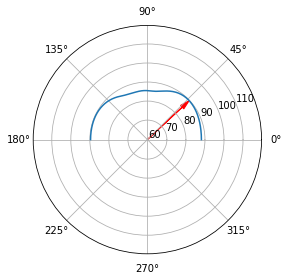

In [88]:
# Create beamformer polar plot

y_beamf_polar = np.sum(y_beamformer**2, axis=1)

y_beamf_polar_dB = 10*np.log10(y_beamf_polar)
dB_max = y_beamf_polar_dB.max()
print(dB_max)
print(y_beamf_polar_dB)
print(np.argmax(y_beamf_polar_dB))
max_index = np.argmax(y_beamf_polar_dB)

# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
# Polar plot dynamic range

dyn_range = 30      # dB
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, y_beamf_polar_dB)

# add arrow indicating direction of arrival of signal
ax.arrow(max_index*np.pi/180, dB_max-dyn_range, 0, dyn_range, width=0.01,
         head_width=0.1, head_length=5,
         length_includes_head=True, edgecolor = 'red', facecolor = 'red')

ax.set_rmax(dB_max + dyn_range)
ax.set_rmin(dB_max - dyn_range)

ax.set_thetamin(0)
ax.set_thetamax(360)
fig.set_tight_layout(True)


And that's it for today! I hope you had fun and learned something :)

All the best,

Fabio
